<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/ArbolDeDecision_BosquesAleatorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión
## podemos pensar en este modelo como una descomposicion de los datos en nodos y ramas. Empezamos en la raiz del árbol y dividimos los datos en la característica que resulta en la mayor ganancia(IG, del ingles information Gain).

## los tres criterios de división más utilizados son Impureza de gini,entropía y error de clasificación.


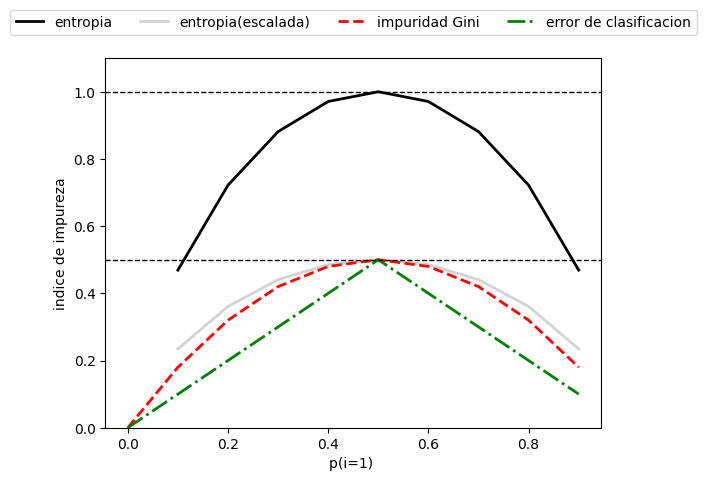

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
  return (p)*(1-(p))+ (1-(p))*(1-(1-p))

def entropia(p):
  return - p * np.log2(p) - (1-p)*np.log2((1-p))

def error(p):
  return 1- np.max([p, 1-p])


x = np.arange(0.0, 1.0, 0.1)
ent = [entropia(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = fig.add_subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['entropia', 'entropia(escalada)', 'impuridad Gini', 'error de clasificacion'],
                          ['-','-','--','-.'],
                          ['black','lightgray','red', 'green','cyan']
                          ):
  ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1) ')
plt.ylabel('indice de impureza')
plt.show()

# crear un árbol de decisión con scikit-learn
## Los árboles de decisión pueden generar límites complejos de decisión dividiendo el espacio de caracteristicas en rectángulos. Debemos tenre en cuenta que mientras profundo es el árbol, más complejo es el límite de decisión, pudiendo caer fácilmente en el sobreajuste

In [11]:
from sklearn.tree import DecisionTreeClassifier
#Vamos a cargar el dataset flor iris para comprobar nuestro árbol de decision.
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
# dividimos el dataset en conjuntos de datos y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
# árbol con una prfundidad máxima de 3
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=1)

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


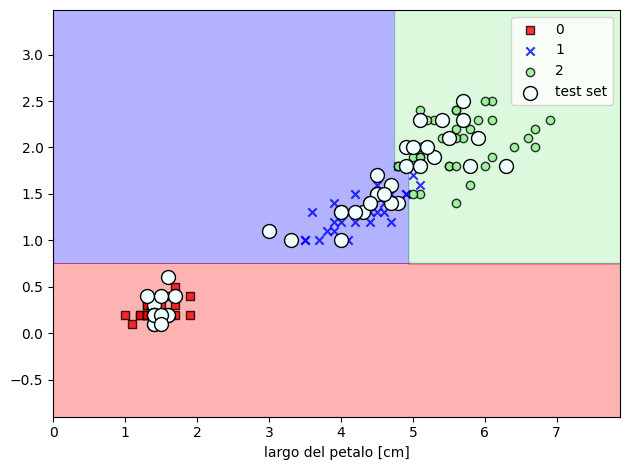

In [21]:
from graficar import plot_decision_regionsNew
plot_decision_regionsNew(X_combined_std, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('largo del petalo [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/content/graficar.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


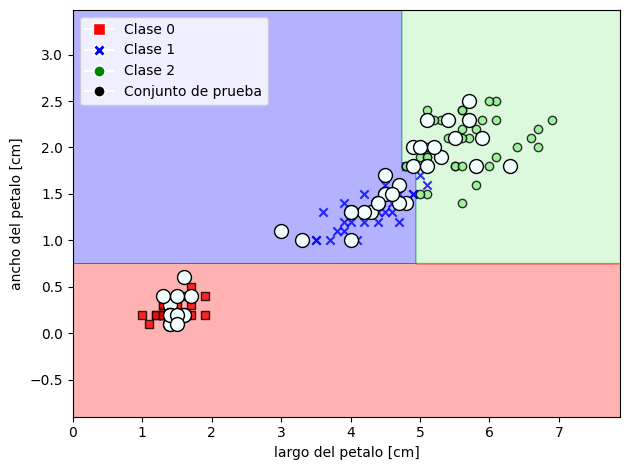

In [25]:

#----Aclaración-------
#Al principio el código anterior no me mostraba las etiquetas de clase
#por lo que adapte está solución que me propuso chat.gpt
#from graficar import plot_decision_regionsNew
#import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Supongo que 'tree' es tu clasificador, asegúrate de que esté definido antes de esta línea
plot_decision_regionsNew(X_combined_std, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('largo del petalo [cm]')
plt.ylabel('ancho del petalo [cm]')

# Crear elementos de línea con marcadores para la leyenda
line0 = Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=8, label='Clase 0')
line1 = Line2D([0], [0], marker='X', color='w', markerfacecolor='blue', markersize=8, label='Clase 1')
line2 = Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8, label='Clase 2')
line_test = Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=8, label='Conjunto de prueba')

# Agregar los elementos de línea a la leyenda
plt.legend(handles=[line0, line1, line2, line_test], loc='best')

plt.tight_layout()
plt.show()
